Yilong You

In [122]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from random import uniform

def simulate_games(num_games, probs=None, min_successes=10, max_iterations=20000, track=False):

    n = num_games # number of games to compare
    prior_params = [(1, 1)] * n # values of alpha and beta for the beta prior distribution for all games, all initialized to (1, 1).

    if probs is None:
        true_probs = []
        for i in range(n):
            true_probs.append(uniform(0, 1))
    else:
        true_probs = probs
        
    # delete games with 0 chance of being won and update n
    true_probs = np.ma.masked_values(true_probs, 0.0)
    n = len(true_probs)
    
    success = [0] * n
    total = [0] * n 
    
    while min(total) < min_successes and sum(total) <= max_iterations:
        # Draw a random sample of n=1 from each of the 3 distributions, find the index of the highest value.
        results = [stats.beta.rvs(params[0], params[1]) for params in prior_params]
        max_index = max(enumerate(results), key=lambda e: e[1])[0]
    
        # Use the true probability of the distribution determined above to simulate a bernoulli trial. Value is either 1 or 0.
        sim_result = stats.bernoulli(true_probs[max_index]).rvs()
        total[max_index] += 1
        success[max_index] += sim_result
    
        # update parameters (alpha, beta) of the prior used for bernoulli 
        prior_params[max_index] = (prior_params[max_index][0] + sim_result, prior_params[max_index][1] + 1 - sim_result)
        # print(prior_params)
    
    theta_hats = list(np.divide(success, total))
    if track:
        domain = np.linspace(-0.1, 1, 1000)
        plt.figure(figsize=(12,4))
    
        for i in range(len(prior_params)):
            plt.plot(domain, stats.beta(prior_params[i][0], prior_params[i][1]).pdf(domain), label=chr(i+65))
        plt.legend()
        plt.title(f"Estimated pdf's of all {n} games")
        
        print("\nThe true chances for the games are: ", true_probs)
        print("The number of simulations made for each game is: ", total)
        print("The estimated chances for the games are: ", theta_hats)
    print("The program would select: ", chr(max(enumerate(theta_hats), key=lambda e: e[1])[0] + 65))


The true chances for the games are:  [0.38441509 0.67076162 0.64413143]
The number of simulations made for each game is:  [10, 6541, 517]
The estimated chances for the games are:  [0.2, 0.6658003363400091, 0.620889748549323]
The program would select:  B


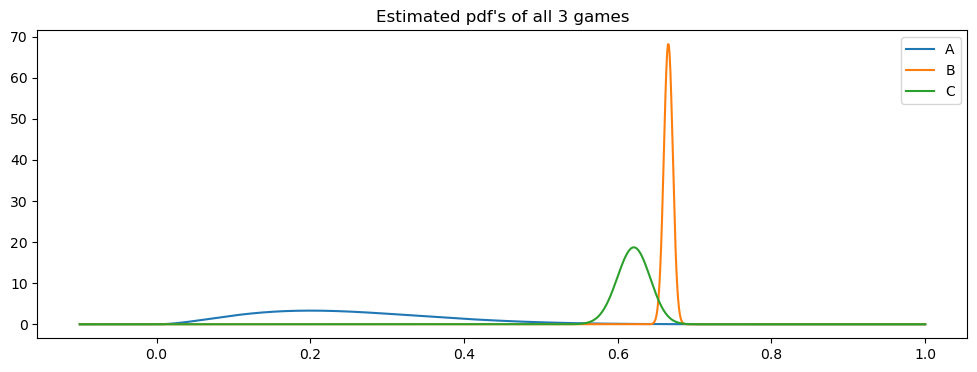

In [125]:
simulate_games(3, track=True)